<a href="https://colab.research.google.com/github/srinijalanda93/SPR_LAB/blob/main/LAB5%266_SPR_2448526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Plot both speech signals to observe their differences

## Signal 2 is longer, representing a slower speech pattern.

# small detail :Linear Time Normalization (LTN) and analyze how time alignment helps in matching temporal patterns.


# aim to provide
# for length and amplitude plot both signals.


# on 2nd one apply the  LTN on Signal 2 to match the length of Signal 1.

#match the alignment btw S1 and the normalized s2.


#alignment -->,  how each sample in s 1 corresponds to a sample in Signal 2.





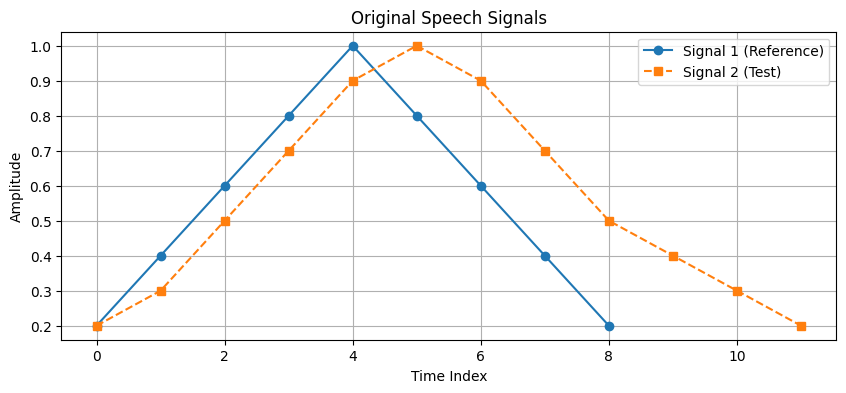

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given signals
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

# Plot original signals
plt.figure(figsize=(10, 4))
plt.plot(signal1, 'o-', label='Signal 1 (Reference)')
plt.plot(signal2, 's--', label='Signal 2 (Test)')
plt.title('Original Speech Signals')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## 2. Perform Linear Time Normalization (resampling Signal 2 to match Signal 1 length)

## LTN involves interpolating the longer signal to have the same number of samples as the shorter one.

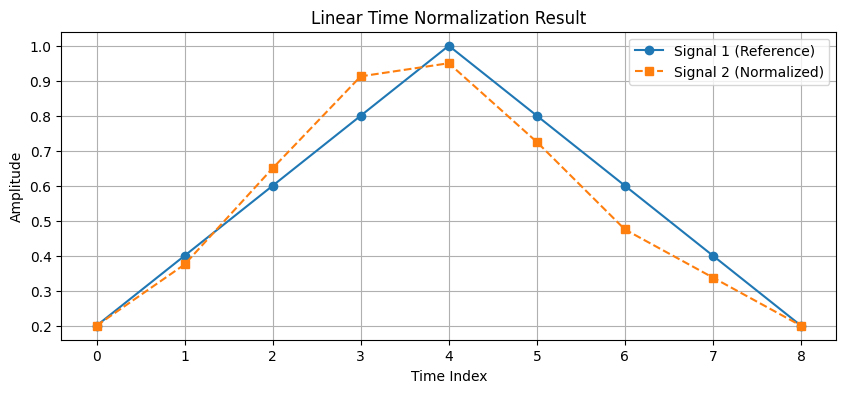

In [ ]:
from scipy.interpolate import interp1d

# Create interpolation function for signal2
x_original = np.linspace(0, 1, len(signal2))
x_target = np.linspace(0, 1, len(signal1))
interp_func = interp1d(x_original, signal2)

# Resample signal2 to match signal1 length
signal2_normalized = interp_func(x_target)

# Plot normalized signal
plt.figure(figsize=(10, 4))
plt.plot(signal1, 'o-', label='Signal 1 (Reference)')
plt.plot(signal2_normalized, 's--', label='Signal 2 (Normalized)')
plt.title('Linear Time Normalization Result')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## 3. Compute alignment between Signal 1 and Normalized Signal 2

## Compute a simple alignment path — i.e., which sample in Signal 1 corresponds to which in Signal 2.

In [ ]:
alignment_pairs = list(zip(range(len(signal1)), range(len(signal2_normalized))))

# Display alignment
print("Alignment path (Signal1 index -> Signal2 index):")
for s1, s2 in alignment_pairs:
    print(f"{s1} -> {s2}")


Alignment path (Signal1 index -> Signal2 index):
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8


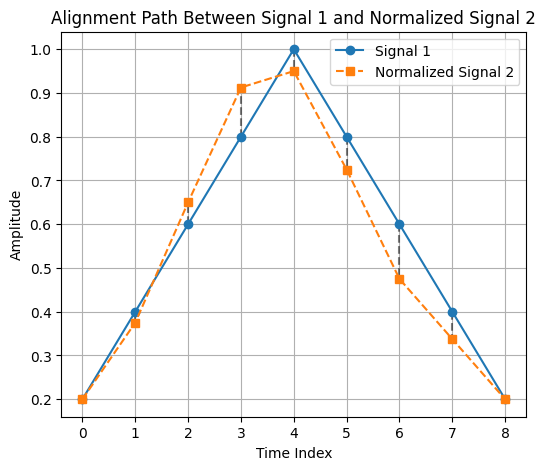

In [ ]:
plt.figure(figsize=(6, 5))
for s1, s2 in alignment_pairs:
    plt.plot([s1, s2], [signal1[s1], signal2_normalized[s2]], 'k--', alpha=0.5)
plt.plot(signal1, 'o-', label='Signal 1')
plt.plot(signal2_normalized, 's--', label='Normalized Signal 2')
plt.title('Alignment Path Between Signal 1 and Normalized Signal 2')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


##lab-6

# Plot both vectors to visualize their patterns.

# Implement the Dynamic Time Warping (DTW) algorithm.

# Compute the accumulated cost matrix.

# Find and visualize the optimal warping path.

# Calculate the DTW distance between the vectors.

# Write an inference explaining how the warping path aligns the two vectors and what the DTW distance reveals about their similarity.

# Dynamic Time Warping (DTW) try to aligns two sequences that differ in time or speed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
v1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
v2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])


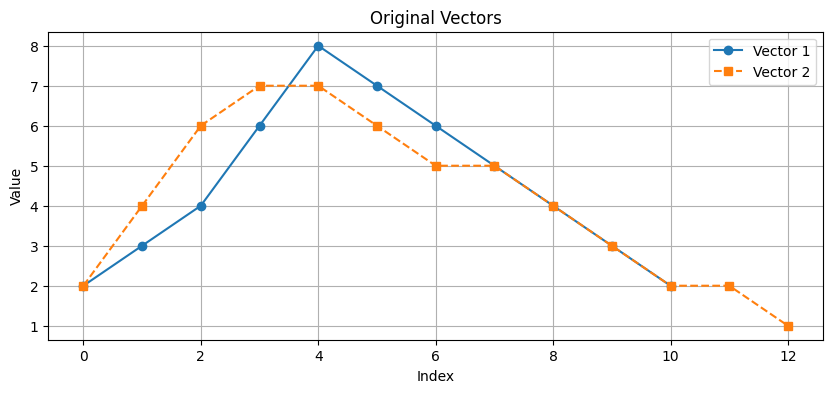

In [ ]:

# Step 1: Plot both vectors
plt.figure(figsize=(10, 4))
plt.plot(v1, 'o-', label='Vector 1')
plt.plot(v2, 's--', label='Vector 2')
plt.title('Original Vectors')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 2: Compute DTW cost matrix
n, m = len(v1), len(v2)
dtw_matrix = np.zeros((n+1, m+1)) + np.inf
dtw_matrix[0, 0] = 0

# Fill cost matrix
for i in range(1, n+1):
    for j in range(1, m+1):
        cost = abs(v1[i-1] - v2[j-1])
        dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # insertion
                                      dtw_matrix[i, j-1],    # deletion
                                      dtw_matrix[i-1, j-1])  # match


In [ ]:
# DTW distance
dtw_distance = dtw_matrix[n, m]
print(f"DTW Distance between vectors: {dtw_distance:.2f}")

# Step 3: Backtrack to find optimal path
i, j = n, m
path = []
while i > 0 and j > 0:
    path.append((i-1, j-1))
    options = [dtw_matrix[i-1, j-1], dtw_matrix[i-1, j], dtw_matrix[i, j-1]]
    move = np.argmin(options)
    if move == 0:
        i, j = i-1, j-1
    elif move == 1:
        i -= 1
    else:
        j -= 1
path.reverse()

DTW Distance between vectors: 3.00


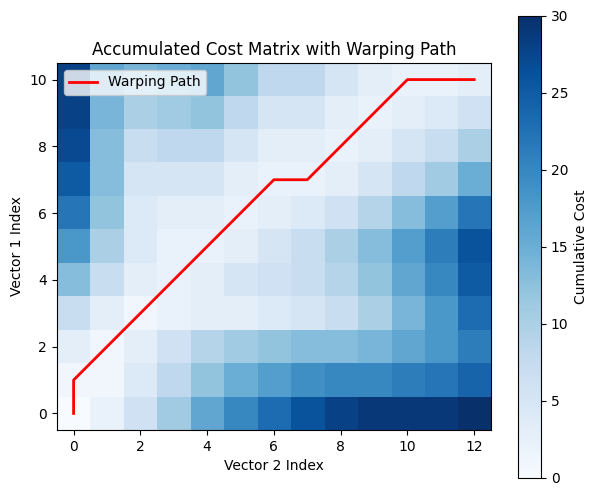

In [ ]:






# Step 4: Plot accumulated cost matrix and warping path
plt.figure(figsize=(7, 6))
plt.imshow(dtw_matrix[1:, 1:], origin='lower', cmap='Blues', interpolation='nearest')
plt.title('Accumulated Cost Matrix with Warping Path')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.colorbar(label='Cumulative Cost')
path_x, path_y = zip(*path)
plt.plot(path_y, path_x, 'r-', linewidth=2, label='Warping Path')
plt.legend()
plt.show()
